# Detecção de objetos usando mapas de ativação

1. Utilizar o código abaixo para obter as ativações da última camada da ResNet antes do pooling global
2. Detectar a posição do valor máximo da ativação;
3. Calcular a posição respectiva do valor máximo na imagem original;
4. Repetir o procedimento para pelo menos 10 imagens e para os modelos ResNet18, ResNet34 e resnet50 e avaliar a acurácia de forma qualitativa

Note que a imagem original possui um tamanho qualquer. Ela é redimensionada para o tamanho 224x224. O mapa de ativação possui tamanho 7x7. Então é preciso realizar alguns cálculos para relacionar a posição do máximo no mapa de ativação e a respectiva posição na imagem original. 

Você pode remover o redimensionamento para o tamanho 224x224, mas nesse caso terá que alterar a class ModelMap.

In [11]:
from PIL import Image
import matplotlib.pyplot as plt
import torch
from torch import nn
from torchvision import models
from torchvision.datasets import OxfordIIITPet
import torchvision.transforms.v2 as transf

class Transforms:
    def __init__(self):

        transforms = transf.Compose([
            transf.PILToTensor(),
            transf.Resize(size=(224,224), antialias=True),
            transf.ToDtype(torch.float32),
            transf.Normalize(mean=(122.7, 114.6, 100.9), std=(59.2, 58.4, 59.0))
        ])

        self.transforms = transforms

    def __call__(self, img):
        return self.transforms(img)
    
class ModelMap(nn.Module):
    """Extrai as ativações antes do global pooling de uma resnet18. É retornada
    uma imagem contendo a média das ativações para todos os filtros. Para o 
    modelo funcionar, a imagem de entrada deve ter tamanho 224x224."""

    def __init__(self):
        super().__init__()

        model = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)
        model.eval()
        model.avgpool = nn.Identity()
        model.fc = nn.Identity()

        self.model = model

    def forward(self, x):

        x = self.model(x)
        x = x.reshape(512, 7, 7)
        #x = x.reshape(2048, 7, 7)   # Para a resnet50

        return x.mean(dim=0)
      
ds = OxfordIIITPet('K:/datasets/segmentation')
transform = Transforms()

model = ModelMap()


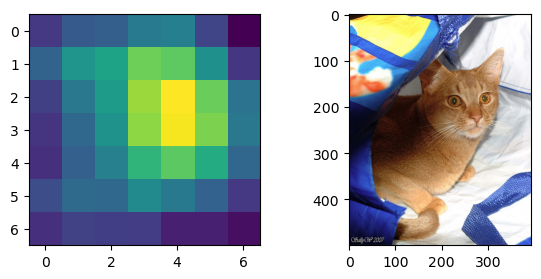

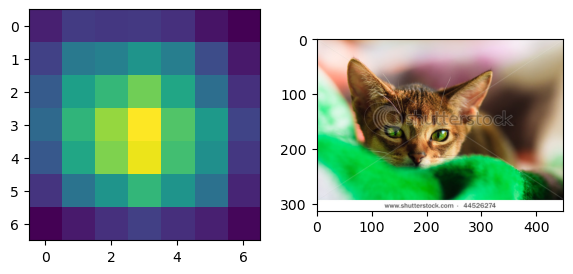

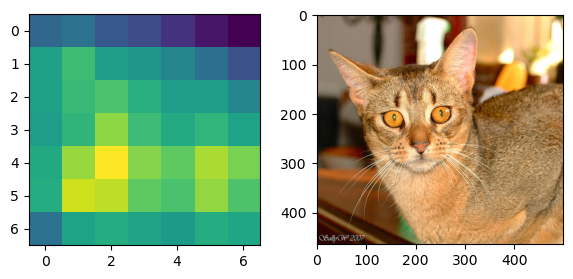

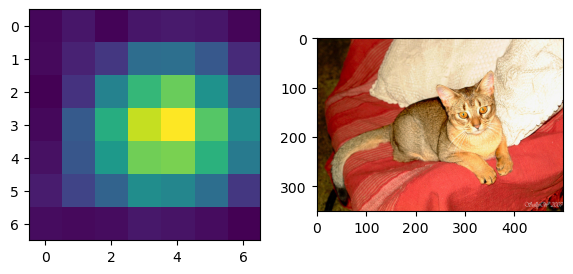

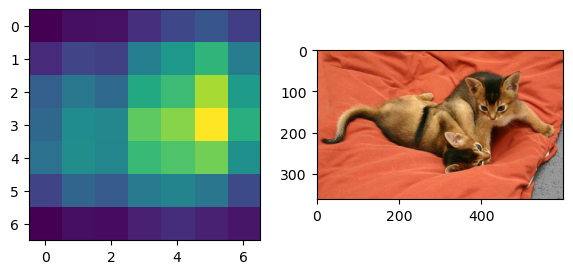

In [12]:
for idx in range(5):
    x_or, _ = ds[idx]
    x = transform(x_or)
    with torch.no_grad():
        map = model(x.unsqueeze(0))
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7,3))
    ax1.imshow(map)
    ax2.imshow(x_or)